# Density estimation

- Is the data distribution unimodal and if it is the case, which model best approximates it( uniform distribution, T-distribution, chi-square distribution, cauchy distribution, etc)?
- If the data distribution is multimodal, can we automatically identify the number of modes and provide more granular descriptive statistics?
- How can we estimate the probability density function of a new dataset?


In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. KDE is non-parametric i.e does not rely on assumption of shape of the data. 

## Histograms

Histogram uses discrete data and is a simplest non-parametric density estimation technique. Histograms consider two main points 
- the size of the bins (the binwidth) 
- and the end points of the bins. 

Histogram works well with normal distribution data but suffers from its bin sizes. The properties of kernel density estimators are, as compared to histograms:
- smooth
- no end points
- depend on bandwidth

A random variables have a probability density function (PDF) associated with it. What KDE is doing is estimating this PDF using the observations of X,Y.

Note that KDE produces probability distributions, not functions and since it generates a probability distribution, it can be used to create new sample data based on existing samples.

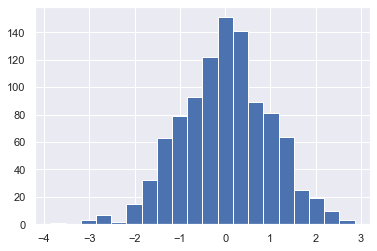

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# create and reshape data into [n_samples, n_features]
X = np.random.randn(1000)[:, None]
plt.hist(X, bins=20);

In [11]:
# perform kernel density
xfit = np.linspace(-5, 5, 1000)[:, np.newaxis]

In [12]:
from sklearn.neighbors import KernelDensity
kde = KernelDensity(bandwidth=0.38, kernel='gaussian').fit(X)

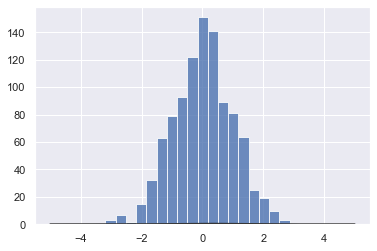

In [13]:
# really unfortunate notation... but this is how you get the density
density = np.exp(kde.score_samples(xfit))
plt.hist(X, bins=20, alpha=0.8)
plt.plot(xfit, density, '-k', lw=2);

### score_samples 

it returns the log of the probability density. probability densities don't have to be between [0,1]. They are densities and not an exact probability.

In [ ]:
logprob = kde.score_samples(xfit)

### Bandwidth selection using Cross-Validation in Scikit-Learn

bandwidth is sensitive to presence of outliers

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=20) # 20-fold cross-validation
grid.fit(x[:, None])
print(grid.best_params_)

# Other Demonstration

In [ ]:
rng = np.random.RandomState(42)
X = rng.random_sample((10, 1))
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X)
log_density = kde.score_samples(X[:3])
log_density

In [ ]:
X

In [ ]:
np.exp(log_density)

In [ ]:
X[:3]

# taking abnormal values

In [ ]:
y = np.array([200])
np.exp(kde.score_samples(y.reshape(-1, 1)))

In [ ]:
X.max(), X.min()